1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

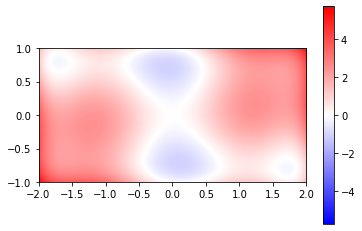

#1 Global minimum = [ 0.08984197 -0.71265635]
#2 Global minimum = [-0.08984198  0.71265633]
Function value at global minima = -1.0316284534898341
What happens for an initial guess of  (𝑥,𝑦)=(0,0)?
I think it gets stuck there 
[0, 0] initial guess solution = [0. 0.]
Function value for this solution = 0.0


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize
import matplotlib.cm as cm

def f(params):
    x, y = params
    return (4 - 2.1 * (x ** 2) + (x ** 4) / 3) * (x ** 2) + x * y + (4 * (y ** 2) - 4) * (y ** 2) 

x = np.linspace(-2, 2, 10000)
y = np.linspace(-1, 1, 10000)
xx, yy = np.meshgrid(x, y, sparse=True)
Z = f([xx, yy])

plt.imshow(Z, interpolation='bilinear', cmap=cm.bwr,
               origin='lower', extent=[-2, 2, -1, 1],
               vmax=abs(Z).max(), vmin=-abs(Z).max())
plt.colorbar()
plt.show()


# global minimimum 1
initial_guess = [1, 1]
solution = optimize.minimize(f, initial_guess)
print('#1 Global minimum =', solution.x)

# global minimimum 2
initial_guess = [-1, -1]
solution = optimize.minimize(f, initial_guess)
print('#2 Global minimum =', solution.x)

print('Function value at global minima =', f(solution.x))

print("""What happens for an initial guess of  (𝑥,𝑦)=(0,0)?
I think it gets stuck there """)

initial_guess = [0, 0]
solution = optimize.minimize(f, initial_guess)
print('[0, 0] initial guess solution =', solution.x)
print('Function value for this solution =', f(solution.x))

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

offset (mu_min - mu_max) = 0.429 days -> min temperature fit is a bit shifted further than the max temp fit
mu_min error = 0.047 days
mu_max error = 0.079 days
errors are much smaller than the calculated offset, so we cannot say that it is the same within the fit accuracy


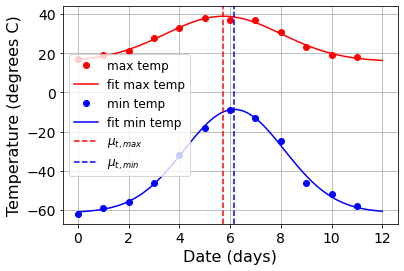

In [2]:
max_temperatures = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_temperatures = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
dates = range(len(max_temperatures))

# Gaussian function
def gaussian(x, mu, sig, a, b):
    return a + b * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Find gaussians
popt_max, pcov_max = optimize.curve_fit(gaussian, dates, max_temperatures, p0=[6, 3, 20, 20])
popt_min, pcov_min = optimize.curve_fit(gaussian, dates, min_temperatures, p0=[6, 3, -60, 50])

# Plotting
x = np.linspace(0, 12, 120)
plt.plot(dates, max_temperatures, 'ro', label="max temp")
plt.plot(x, gaussian(x, *popt_max), 'r-', label='fit max temp')
plt.plot(dates, min_temperatures, 'bo', label="min temp")
plt.plot(x, gaussian(x, *popt_min), 'b-', label='fit min temp')

# time offset
mu_max = popt_max[0]
mu_min = popt_min[0]
print(f"offset (mu_min - mu_max) = {round(mu_min - mu_max, 3)} days -> min temperature fit is a bit shifted further than the max temp fit")
perr_min = np.sqrt(np.diag(pcov_min))
print('mu_min error =', round(perr_min[0], 3), 'days')
perr_max = np.sqrt(np.diag(pcov_max))
print('mu_max error =', round(perr_max[0], 3), 'days')
print('errors are much smaller than the calculated offset, so we cannot say that it is the same within the fit accuracy')
plt.axvline(x = mu_max, color='red', linestyle='--', label=r'$\mu_{t,max}$')
plt.axvline(x = mu_min, color='blue', linestyle='--', label=r'$\mu_{t,min}$')

plt.xlabel('Date (days)', fontsize=16)
plt.ylabel('Temperature (degrees C)', fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.show()

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

R2 = 0.9895621502831471
R = 0.994767385011766
chi2 = 6954.305737935896
n degrees of freedom = 49
p-value = 0.0


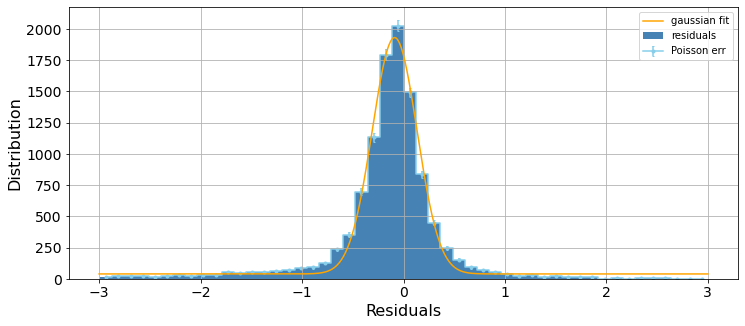

In [3]:
import pickle
import pandas as pd 

# loading dataframe
f = open('residuals_261.pkl', 'rb')
data = pickle.load(f)
df = pd.DataFrame(data.item())
fig, ax  = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

# clearing the outliers
threshold = 3 
residuals =  df['residuals'][abs(df['residuals']) < threshold]

# creating the histogram
bins_no = 50 
x_histogram = np.histogram(residuals, bins = bins_no)
dist = x_histogram[0]
bins = x_histogram[1]
sigma = dist ** 0.5
bincentres = [(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]
ax.hist(residuals, bins=bins_no, label='residuals', color='steelblue', zorder=0)

# finding the gaussian to fit the histogram
popt, pcov = optimize.curve_fit(gaussian, bincentres, dist, p0=[0, 1, 0, 1000])

# plotting errorbars
ax.errorbar(bincentres, dist, yerr = sigma,
            marker = '.', capsize=1, color='skyblue', drawstyle = 'steps-mid', label='Poisson err', zorder=1)

# plotting gaussian fit
x = np.linspace(-3, 3, 1000)
ax.plot(x, gaussian(x, *popt), 'orange', label='gaussian fit', zorder=2)

# blah blah labels blah
ax.grid()
ax.set_xlabel('Residuals', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
ax.tick_params(labelsize=14)
ax.tick_params(labelsize=14)
ax.legend()

# omg test
ssr = np.sum([(gaussian(bincentre, *popt) - dist[idx]) ** 2 for idx, bincentre in enumerate(bincentres)])
tss = np.sum((np.mean(dist) - dist) ** 2 )
rsq = 1 - ssr / tss
print("R2 =", rsq)
print("R =", np.sqrt(rsq))

# p2 value
chi2 = np.sum([(gaussian(bincentre, *popt) - dist[idx]) ** 2 / sigma[idx] ** 2 for idx, bincentre in enumerate(bincentres)])
print('chi2 =', chi2)
ndof = len(dist) - 1
print("n degrees of freedom =", ndof)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
from scipy import stats
pvalue = 1 - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) 

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

best values [a, b, c]:  [-9.96203468 -0.23462776  9.26282131]
average temperature is given by parameter c =  9.26 Celsius degrees
temperature of the coldest time of year c + a =  -0.7 Celsius degrees
temperature of the hottest time of year c - a =  19.22 Celsius degrees
b (b/2pi) is a constant which calibrates the time of the year as defined by humans to match the climate time
best values [a, b, c, d]:  [-9.96077193  1.00029326 -3.93837284  9.26567262]
average temperature is given by parameter c =  9.27 Celsius degrees
temperature of the coldest time of year c + a =  -0.7 Celsius degrees
temperature of the hottest time of year c - a =  19.23 Celsius degrees


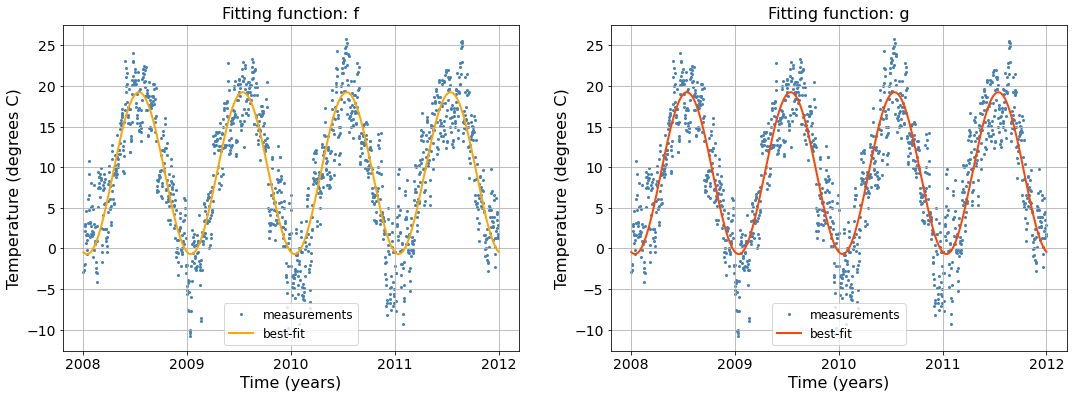

SSR-f = 18669.515394578364
SSR-g = 18669.22543085199
Test f (3 params) vs g (4 params):
CL: 0.880 , additional parameter necessary: NO


In [4]:
# reading and cleansing data
data = open("munich_temperatures_average_with_bad_data.txt", "r")
df = pd.read_csv(data, names=['year', 'temperature'], delimiter=" ")
x = df['year'][2008.0 <= df['year']][df['year'] <= 2012.0][df['temperature'] < 30]
y = df['temperature'][2008.0 <= df['year']][df['year'] <= 2012.0][df['temperature'] < 30]

# plot temperature measurements
fig, (axf, axg) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axf.plot(x, y, 'o', color='steelblue', markersize=2, label='measurements', zorder=1)
axg.plot(x, y, 'o', color='steelblue', markersize=2, label='measurements', zorder=1)

# fitting function f
def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# best-fit
fopt, fcov = optimize.curve_fit(f, x, y, p0=[-15, 0, 10])
print('best values [a, b, c]: ', fopt)

# fit plotting
axf.plot(x, f(x, *fopt), color='orange', label='best-fit', linewidth=2, zorder=2)

axf.set_title('Fitting function: f', fontsize=16)
axf.set_xlabel('Time (years)', fontsize=16)
axf.xaxis.set_major_locator(plt.MaxNLocator(5))
axf.set_ylabel('Temperature (degrees C)', fontsize=16)
axf.tick_params(labelsize=14)
axf.grid()
axf.legend(fontsize=12)

# average temperature in Munich
print("average temperature is given by parameter c = ", round(fopt[2], 2), 'Celsius degrees')

# typical daily average values predicted by the model for the coldest and hottest time of year
print("temperature of the coldest time of year c + a = ", round(fopt[2] + fopt[0], 2), 'Celsius degrees')
print("temperature of the hottest time of year c - a = ", round(fopt[2] - fopt[0], 2), 'Celsius degrees')
physical_meaning_of_b = "b (b/2pi) is a constant which calibrates the time of the year as defined by humans to match the climate time"
print(physical_meaning_of_b)

# new fitting function g
def g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b * t + c) + d


# best-fit
gopt, gcov = optimize.curve_fit(g, x, y, p0=[-15, 1, 0, 10])
print('best values [a, b, c, d]: ', gopt)

# fit plotting
axg.plot(x, g(x, *gopt), color='orangered', label='best-fit', linewidth=2, zorder=2)

axg.set_title('Fitting function: g', fontsize=16)
axg.set_xlabel('Time (years)', fontsize=16)
axg.xaxis.set_major_locator(plt.MaxNLocator(5))
axg.set_ylabel('Temperature (degrees C)', fontsize=16)
axg.tick_params(labelsize=14)
axg.grid()
axg.legend(fontsize=12)

# average temperature in Munich
print("average temperature is given by parameter c = ", round(gopt[3], 2), 'Celsius degrees')

# typical daily average values predicted by the model for the coldest and hottest time of year
print("temperature of the coldest time of year c + a = ", round(gopt[3] + gopt[0], 2), 'Celsius degrees')
print("temperature of the hottest time of year c - a = ", round(gopt[3] - gopt[0], 2), 'Celsius degrees')

plt.show()


# computing RSS for f and g
ssr_f = np.sum((f(x, *fopt) - y) ** 2)
ssr_g = np.sum((g(x, *gopt) - y) ** 2)
print('SSR-f =', ssr_f)
print('SSR-g =', ssr_g)

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

ndof_f = 3 - 1
ndof_g = 4 - 1

# run F-test
# test f vs g
print("Test f (3 params) vs g (4 params):")
N = len(x)
cl_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N, verbose=True)